In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("SMSSpamCollection", sep="\t", names=['label','message'])

In [3]:
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.isnull().sum()

label      0
message    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# detect spam as 1
data['label'] = data['label'].map({'ham':0,'spam':1})
data

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

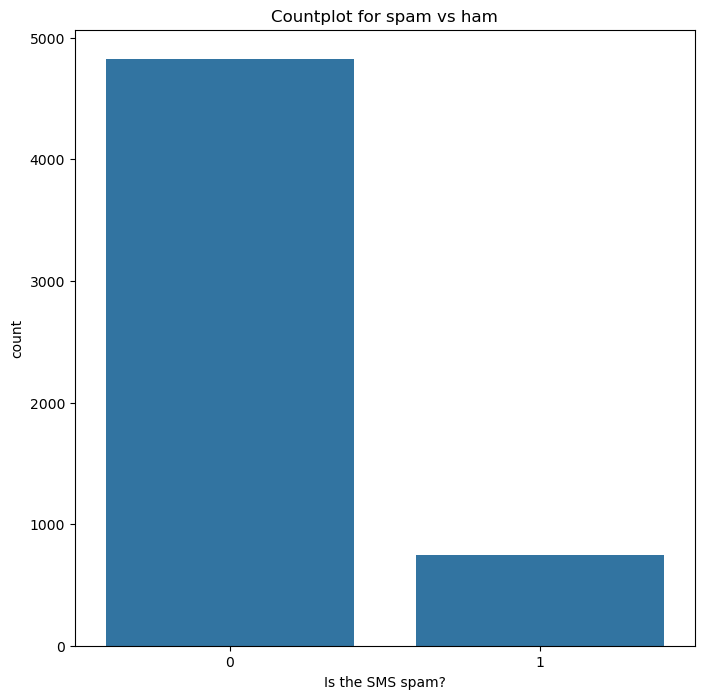

In [9]:
# Countplot for spam vs ham dataset
plt.figure(figsize=(8,8))
graph = sns.countplot(x=data["label"],data=data)
plt.title("Countplot for spam vs ham")
plt.xlabel("Is the SMS spam?")
plt.ylabel("count")
plt.show()

In [10]:
# Handling imbalanced dataset
only_spam = data[data["label"]==1]

In [11]:
only_spam.count()

label      747
message    747
dtype: int64

In [12]:
print("No. of total SMS: ",len(data))
print("No. of ham SMS: ",len(only_spam))
print("No. of spam SMS: ",len(data) - len(only_spam))

No. of total SMS:  5572
No. of ham SMS:  747
No. of spam SMS:  4825


In [13]:
count = int((data.shape[0] - only_spam.shape[0]) / only_spam.shape[0])
count

6

In [14]:
for i in range(count-1):
    data = pd.concat([data, only_spam])

In [15]:
data.shape

(9307, 2)

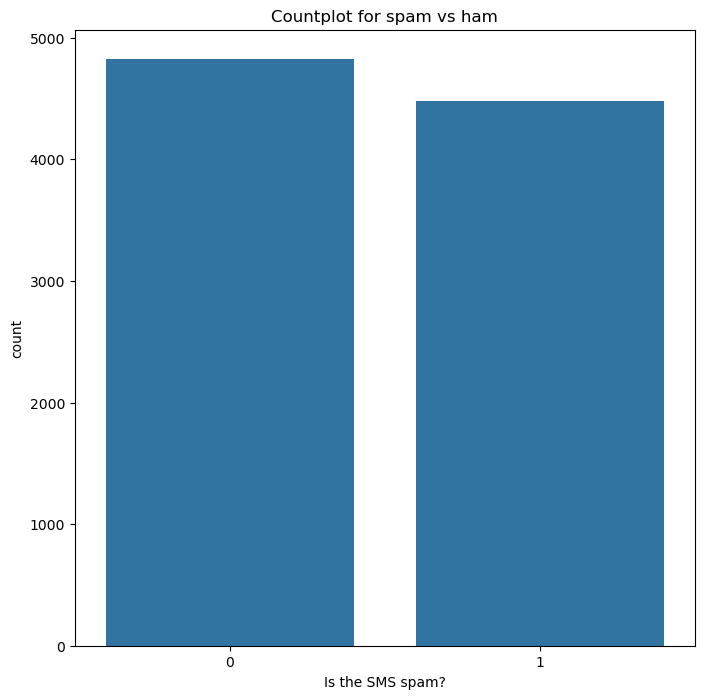

In [16]:
# Countplot for spam vs ham dataset for balanced dataset
plt.figure(figsize=(8,8))
graph = sns.countplot(x=data["label"],data=data)
plt.title("Countplot for spam vs ham")
plt.xlabel("Is the SMS spam?")
plt.ylabel("count")
plt.show()

In [17]:
# creating new feature word count
data["word_count"] = data["message"].apply(lambda x: len(x.split()))

In [18]:
data

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


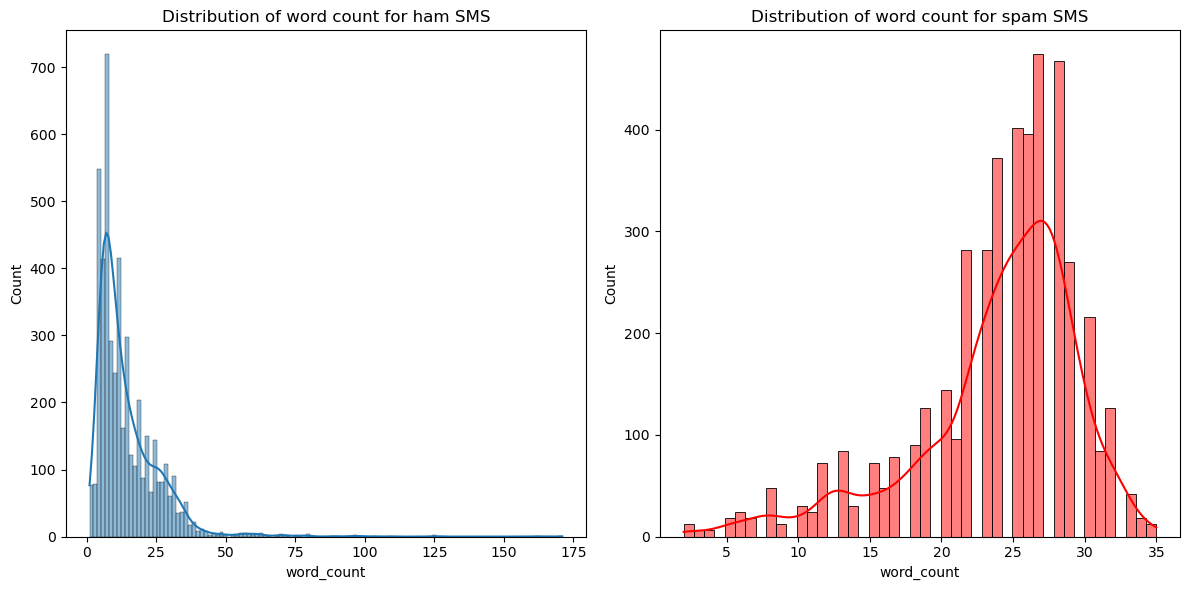

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)    # plt.subplot(rows,columns,Index)
sns.histplot(data[data["label"]==0].word_count, kde=True)
plt.title("Distribution of word count for ham SMS")

plt.subplot(1,2,2)    # plt.subplot(rows,columns,Index)
sns.histplot(data[data["label"]==1].word_count, color = 'r', kde=True)
plt.title("Distribution of word count for spam SMS")

plt.tight_layout()
plt.show()

In [20]:
# Creating a new feature for containing currency symbol
def currency_present(data):
    currency_symbols = ['$','£','€','₹','₩','रु','дин'] 
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [21]:
data['contains_currency_symbols'] = data['message'].apply(currency_present)
data

,label,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


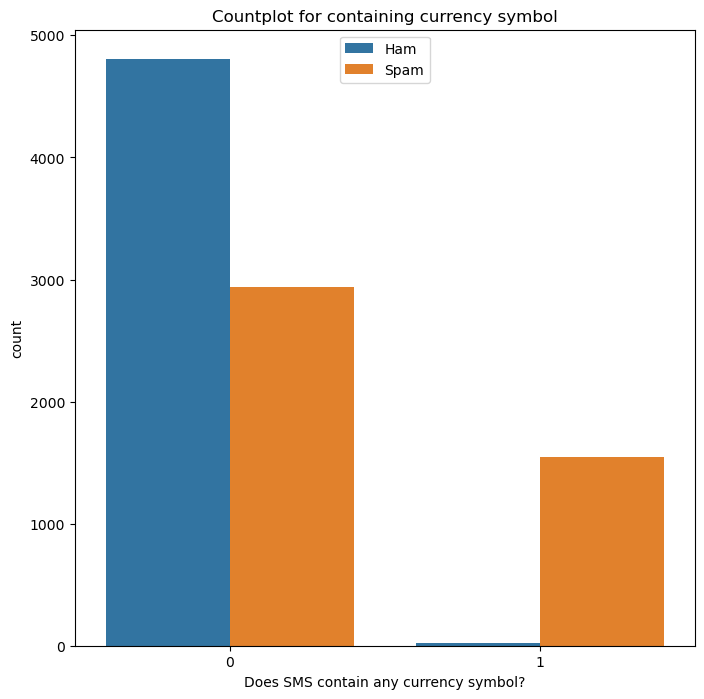

In [22]:
# Countplot to check which SMS contains currency symbol
plt.figure(figsize=(8,8))
sns.countplot(x=data['contains_currency_symbols'], data=data, hue='label')
plt.title('Countplot for containing currency symbol')
plt.xlabel('Does SMS contain any currency symbol?')
plt.ylabel('count')
plt.legend(labels=(['Ham','Spam']), loc=9)
plt.show()

In [23]:
# Creating new feature of containing numbers
def number(data):
    for i in data:
        if ord(i) >=48 and ord(i) <= 57:
            return 1
    return 0

In [24]:
data["contains_number"] = data["message"].apply(number)
data

,label,message,word_count,contains_currency_symbols,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


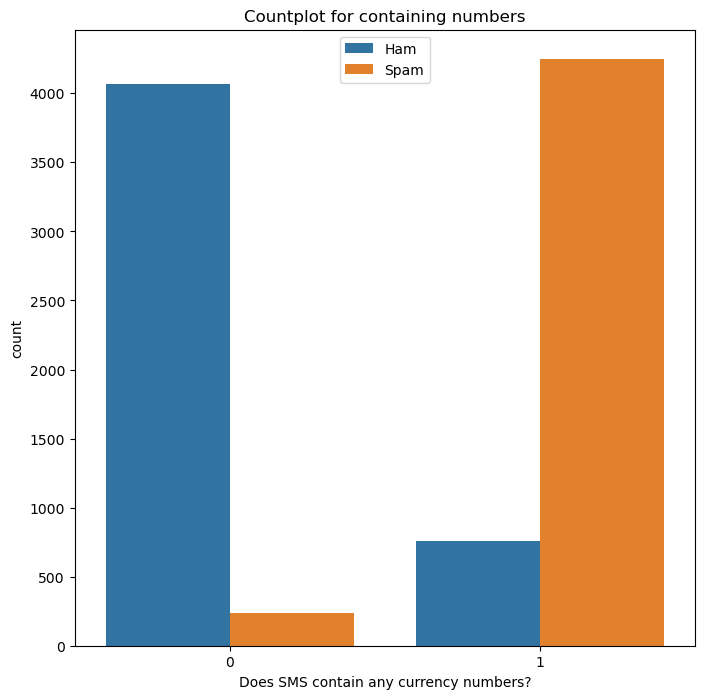

In [25]:
# Countplot to check which SMS contains numbers
plt.figure(figsize=(8,8))
sns.countplot(x=data['contains_number'], data=data, hue='label')
plt.title('Countplot for containing numbers')
plt.xlabel('Does SMS contain any currency numbers?')
plt.ylabel('count')
plt.legend(labels=(['Ham','Spam']), loc=9)
plt.show()

In [26]:
# Data cleaning
import nltk
import re
# nltk.download("stopwords")
# nltk.download("wordnet")

In [27]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [28]:
corpus = []
wnl = WordNetLemmatizer()

In [29]:
for sms in list(data.message):
    message = re.sub(pattern='[^a-zA-Z]', repl=" ", string = sms)    # Filtering out special characters and numbers
    message = message.lower()
    words = message.split()
    message = [word for word in words if word not in set(stopwords.words("english"))]
    message = [wnl.lemmatize(word) for word in message]
    message = " ".join(message)

    corpus.append(message)

In [30]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [31]:
# Creating the bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf = TfidfVectorizer(max_features = 500)
vector = tfidf.fit_transform(corpus).toarray()
feature_name = tfidf.get_feature_names_out()

In [33]:
X = pd.DataFrame(vector, columns = feature_name)
y = data["label"]

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [36]:
X_test

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.72412,0.0,0.0,0.0,0.0
1790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.557154,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
6489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
8891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [37]:
# Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.943
0.004


In [38]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [40]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[905,  54],
       [ 56, 847]], dtype=int64)

In [41]:
plt.figure(figsize=(8,8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, xticklabels = axis_labels, yticklabels = axis_labels, annot = True, fmt = 'g', cbar_kws = {"shrink": 0.5}, cmap = "Blues")
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")

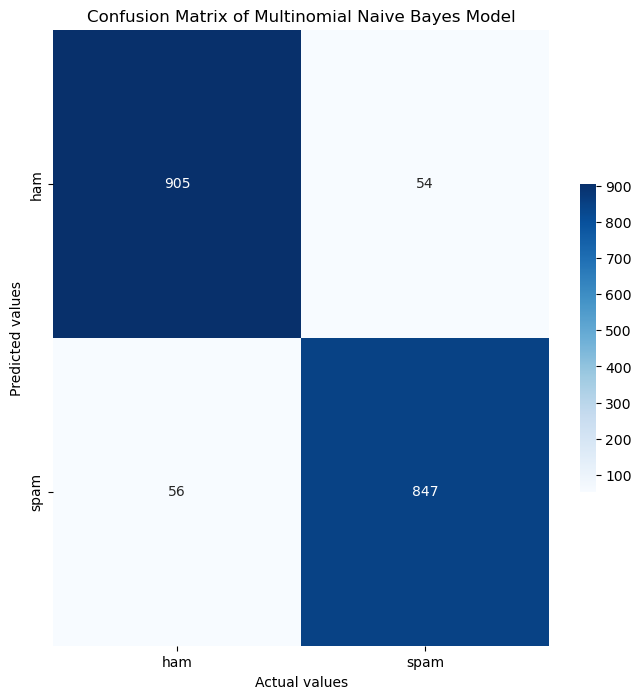

In [42]:
plt.show()

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt, X, y, scoring='f1' , cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.98
0.003


In [45]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.97      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [47]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[929,  30],
       [  4, 899]], dtype=int64)

In [48]:
plt.figure(figsize=(8,8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, xticklabels = axis_labels, yticklabels = axis_labels, annot = True, fmt = 'g', cbar_kws = {"shrink": 0.5}, cmap = "Blues")
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")

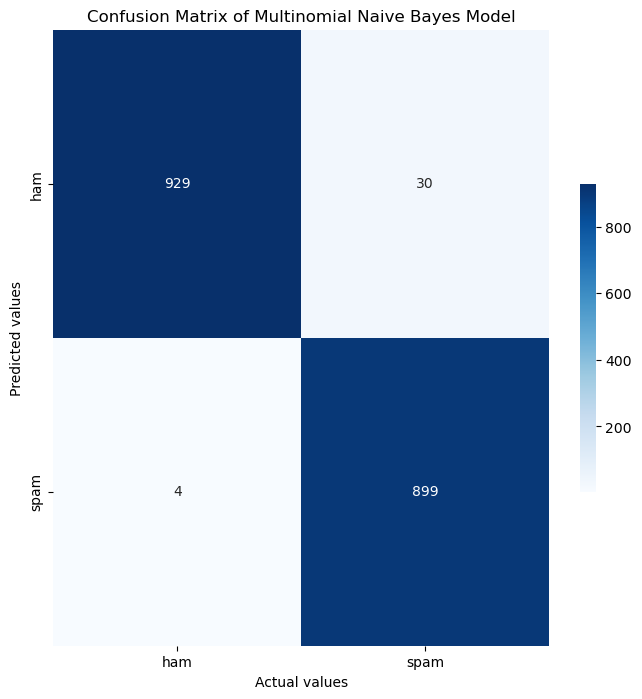

In [49]:
plt.show()

In [50]:
def predict_spam(sms):
    message = re.sub(pattern='[^a-zA-Z]', repl=" ", string = sms)    # Filtering out special characters and numbers
    message = message.lower()
    words = message.split()
    message = [word for word in words if word not in set(stopwords.words("english"))]
    message = [wnl.lemmatize(word) for word in message]
    message = " ".join(message)
    temp = tfidf.transform([message]).toarray()
    return dt.predict(temp)

In [51]:
# Prediction 1 - Lottery text message
sample_message = "WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."

if predict_spam(sample_message):
    print("GOTACHA THIS IS A SPAM MESSAGE")
else:
    print("This is a Ham(normal) message")

GOTACHA THIS IS A SPAM MESSAGE


C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
